Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to 
allow potential real estate investors to choose rental investment properties.

In [37]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [38]:
import numpy as np
print(np.__version__)

1.20.1


In [39]:
# !pip install numpy --upgrade

In [40]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

## Load Data

In [41]:
# Read the census data into a Pandas DataFrame
file_path = Path("./Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


In [42]:
to_data.index
# index check

Int64Index([2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001,
            ...
            2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016],
           dtype='int64', name='year', length=560)

- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [43]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
dwelling_type_units = to_data[["single_detached_house",
                               "apartment_five_storeys_plus",
                               "movable_dwelling", 
                               "semi_detached_house", 
                               "row_house", "duplex", 
                               "apartment_five_storeys_less", 
                               "other_house"]]
dwelling_type_sum = dwelling_type_units.groupby('year').sum()
dwelling_type_sum.head(10)

# Googled:
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html 
    # -> used this to create a new dataframe
        # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
  
# From Week 6/1/06-Stu_Composing_Masterpieces/Solved/ activities
    # loan_data = loan_data.groupby('State Code').sum()
    # loan_data.head()
   
# This seemed to be a lot harder than it should have been, and has taken me three hours to work out believe it or not

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
year,,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900,3040
2006,266860,379400,165,69430,54690,44095,162850,1335
2011,274940,429220,100,72480,60355,44750,163895,2165
2016,269680,493270,95,71200,61565,48585,165575,2845


In [44]:
# Save the dataframe as a csv file

dwelling_type_sum.to_csv('dwelling_type_sum.csv')

# Googled https://towardsdatascience.com/how-to-export-pandas-dataframe-to-csv-2038e43d9c03 
# The easiest way to do this "df.to_csv('file_name.csv')"

In [45]:
# dwelling_type_sum.loc[2001].plot.bar()

# Test hvplot installation -> Lost hours from type errors caused by problematic installation, and fixed by my tutor
# Seriously, the amount of time lost from the confusing environment and package installations is super frustrating

In [46]:
 # create_bar_chart function

In [47]:
 def create_bar_chart(data, bar_title, bar_xlabel, bar_ylabel, bar_color):
    dwelling_plot = data.plot.bar(title = bar_title, color = bar_color)
    dwelling_plot.set_xlabel(bar_xlabel)
    dwelling_plot.set_ylabel(bar_ylabel)
    plt.show()
    
    """
    Create a barplot based in the data argument.
    
    """        
# Googled https://hvplot.holoviz.org/user_guide/Plotting.html

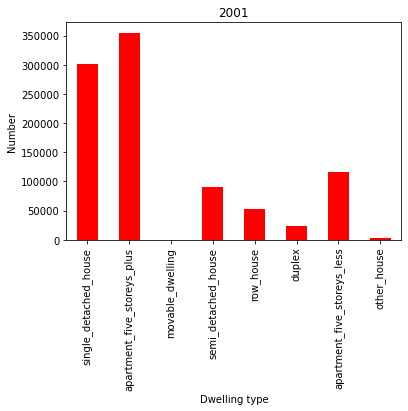

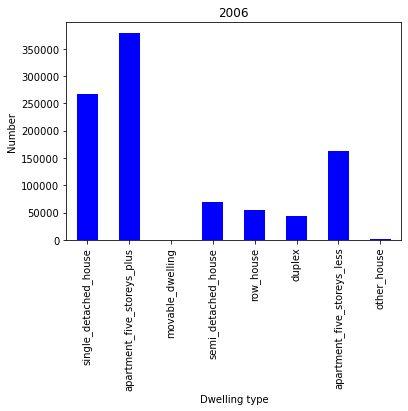

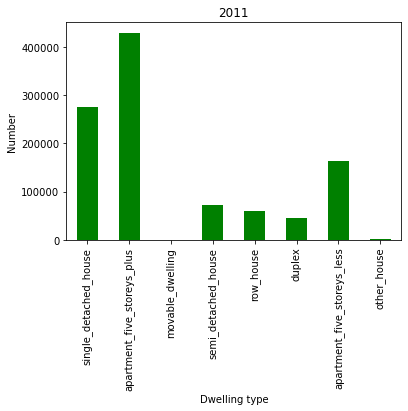

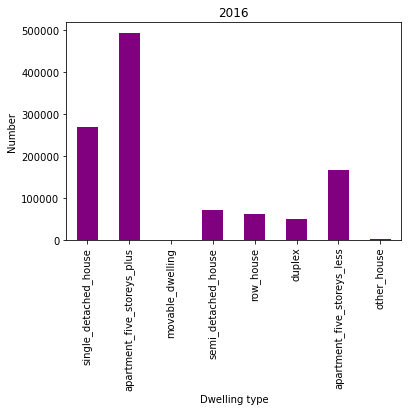

In [48]:
# Create a bar chart per year to show the number of dwelling types

# Bar chart for 2001
bar_2001 = create_bar_chart(dwelling_type_sum.loc[2001], "2001", "Dwelling type", "Number", "red")

# Bar chart for 2006
bar_2006 = create_bar_chart(dwelling_type_sum.loc[2006], "2006", "Dwelling type", "Number", "blue")

# Bar chart for 2011
bar_2011 = create_bar_chart(dwelling_type_sum.loc[2011], "2011", "Dwelling type", "Number", "green")

# Bar chart for 2016
bar_2016 = create_bar_chart(dwelling_type_sum.loc[2016], "2016", "Dwelling type", "Number", "purple")

- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [49]:
# Calculate the average monthly shelter costs for owned and rented dwellings

monthly_shelter_costs = to_data[["shelter_costs_owned","shelter_costs_rented"]]
monthly_shelter_costs = monthly_shelter_costs.groupby('year').sum()
monthly_shelter_costs.head()


,shelter_costs_owned,shelter_costs_rented
year,,
2001,118563,152031
2006,184352,129558
2011,202750,142771
2016,246584,175885


In [50]:
monthly_shelter_costs = to_data[["shelter_costs_owned","shelter_costs_rented"]]
monthly_shelter_costs = monthly_shelter_costs.groupby('year').mean()
monthly_shelter_costs.head()

,shelter_costs_owned,shelter_costs_rented
year,,
2001,846.878571,1085.935714
2006,1316.800000,925.414286
2011,1448.214286,1019.792857
2016,1761.314286,1256.321429


In [51]:
# create_line_chart function

def create_line_chart(data, line_title, line_xlabel, line_ylabel, line_color):
    
    """
    Create a line chart based in the data argument.
    
    """
    dwelling_plot = data.plot.line(title = line_title, color = line_color)
    dwelling_plot.set_xlabel(line_xlabel)
    dwelling_plot.set_ylabel(line_ylabel)
    plt.show()

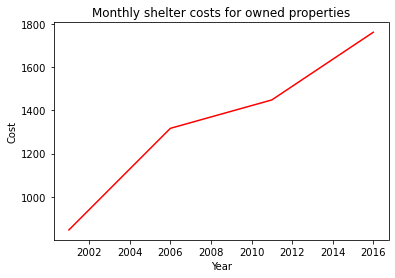

In [52]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelling and other for rented dwellings per year

# Line chart for owned dwellings
    
line_owned = create_line_chart(monthly_shelter_costs
        ["shelter_costs_owned"], 
        "Monthly shelter costs for owned properties", 
        "Year", 
        "Cost", 
        "red"
)

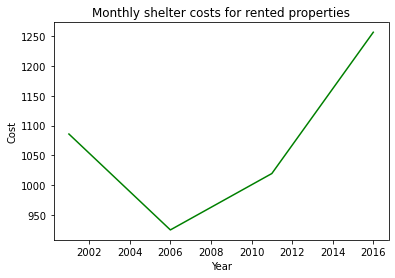

In [53]:
# Line chart for rented dwellings

line_rent = create_line_chart(monthly_shelter_costs
        ["shelter_costs_rented"],
        "Monthly shelter costs for rented properties",
        "Year", 
        "Cost",
        "green"
)

## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [54]:
# Calculate the average house value per year
average_house_value_per_year = to_data["average_house_value"]
average_house_value_per_year = average_house_value_per_year.groupby('year').mean()
average_house_value_per_year.head()


year
2001    289882.885714
2006    424059.664286
2011    530424.721429
2016    664068.328571
Name: average_house_value, dtype: float64

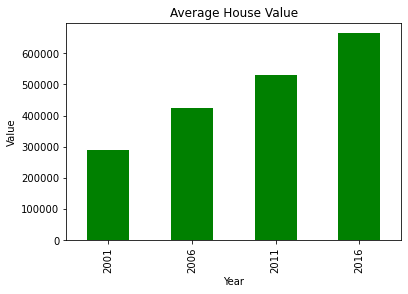

In [55]:
# Plot the average house value per year as a bar chart

average_house_value_per_year.plot.bar(
    title = "Average House Value", 
    color = "green",
    ylabel = "Value",
    xlabel = "Year"
)
plt.show()

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [56]:
# Create a new DataFrame with the mean house values by neighbourhood per year
average_house_values_by_neighbourhood = to_data[["neighbourhood","average_house_value"]].reset_index()
average_house_values_by_neighbourhood

,year,neighbourhood,average_house_value
0,2001,Agincourt North,200388
1,2001,Agincourt South-Malvern West,203047
2,2001,Alderwood,259998
3,2001,Annex,453850
4,2001,Banbury-Don Mills,371864
...,...,...,...
555,2016,Wychwood,787760
556,2016,Yonge-Eglinton,1127052
557,2016,Yonge-St.Clair,1131888
558,2016,York University Heights,425769


In [57]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood

# average_house_values_by_neighbourhood.hvplot.line()
# A quick test to see if hvplot installation has worked

In [58]:
average_house_values_by_neighbourhood.hvplot.line(
    x='year',
    y='average_house_value', 
    groupby='neighbourhood',
    xlabel="Year",
    ylabel="Average house value",
    title ="An interactive line chart of the average house value per neighbourhood"
).opts(yformatter="%.0f")

# From Week 6/1/07-Ins_Viz_Options/Solved activities

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [59]:
# Fetch the data of all dwelling types per year
dwelling_type_neighbourhood = to_data[
    ["neighbourhood",
     "single_detached_house",
     "apartment_five_storeys_plus",
     "movable_dwelling", "semi_detached_house", 
     "row_house", "duplex", 
     "apartment_five_storeys_less", 
     "other_house"]
].reset_index()
dwelling_type_neighbourhood

,year,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
0,2001,Agincourt North,3715,1480,0,1055,1295,195,185,5
1,2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0
2,2001,Alderwood,3175,315,0,470,50,185,370,0
3,2001,Annex,1060,6090,5,1980,605,275,3710,165
4,2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0
...,...,...,...,...,...,...,...,...,...,...
555,2016,Wychwood,920,1295,0,880,290,395,2080,35
556,2016,Yonge-Eglinton,1400,1995,0,465,60,310,1445,0
557,2016,Yonge-St.Clair,520,4315,0,450,220,130,1370,0
558,2016,York University Heights,1235,5505,0,1360,775,280,995,0


In [60]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood

# dwelling_type_neighbourhood.hvplot.bar()
# A quick test hvplt.bar() coz I've had some much trouble with kernel environments...

In [61]:
dwelling_type_neighbourhood.hvplot.bar(
    x='year',
    groupby='neighbourhood',
    xlabel="Dwelling type by year",
    ylabel="Units",
    rot=90,
    title = "Interactive bar chart of the number of dwelling types per neighbourhood by year"
)
# My version of an interactive bar chart of the number of dwelling types per neighbourhood

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [62]:
# Getting the data from the top 10 expensive neighbourhoods
top_ten_expensive = to_data[['neighbourhood','average_house_value']].reset_index().drop(columns = ['year'])
top_ten_expensive = top_ten_expensive.groupby(['neighbourhood']).mean()
top_ten_expensive = top_ten_expensive.sort_values(by='average_house_value',ascending=False).head(10)
top_ten_expensive

# How to sort a column of stuff googled at:
# sort_values https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html 

,average_house_value
neighbourhood,
Bridle Path-Sunnybrook-York Mills,1526485.75
Forest Hill South,1195992.50
Lawrence Park South,1094027.75
Rosedale-Moore Park,1093640.00
St.Andrew-Windfields,999107.00
Casa Loma,981064.25
Bedford Park-Nortown,930415.25
Forest Hill North,851680.50
Kingsway South,843234.25


In [63]:
# Plotting the data from the top 10 expensive neighbourhoods
# YOUR CODE HERE!

top_ten_expensive.hvplot.barh(
    xlabel="Neighbourhood",
    ylabel="Average House Value $",
    title = "The top 10 expensive neighbourhoods",
    rot=45,
    height = 500,
    width = 900
).opts( xformatter="%.0f",fontsize={
    'title': 15, 
    'labels': 14, 
    'xticks': 10, 
    'yticks': 10,
})

# Man, I tried everything to find something to convert 1.400e+6 to normal numbers... no luck!!!
# Googled https://stackoverflow.com/questions/59070661/change-fontsize-in-holoviews-or-hvplot
    # .opts(fontscale=2) didn't work
    # .opts(fontsize={'title': 15, 'labels': 14, 'xticks': 10, 'yticks': 10,}) didn't do what I wanted
# Tried turning the bars horizontal, still didn't work
# Finally found in Week 6/1/07-Ins_Viz_Options/Solved/viz_options actvities - use < xformatter="%.0f", >
# Now go back and fix the earlier graph:"An interactive line chart of the average house value per neighbourhood"

:Bars   [neighbourhood]   (average_house_value)

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [64]:
# Load neighbourhoods coordinates data
file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations.head()

,neighbourhood,lat,lon
0,Agincourt North,43.805441,-79.266712
1,Agincourt South-Malvern West,43.788658,-79.265612
2,Alderwood,43.604937,-79.541611
3,Annex,43.671585,-79.404001
4,Banbury-Don Mills,43.737657,-79.349718


In [65]:
average_house_values_by_neighbourhood.head()

,year,neighbourhood,average_house_value
0,2001,Agincourt North,200388
1,2001,Agincourt South-Malvern West,203047
2,2001,Alderwood,259998
3,2001,Annex,453850
4,2001,Banbury-Don Mills,371864


### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [66]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE! recommendation to me to try pd.merge(df_1, df_2, on="mergebycolumn") rather than concat etc

left = df_neighbourhood_locations
right = average_house_values_by_neighbourhood.groupby(by=['neighbourhood']).mean()

In [67]:
# Join the average values with the neighbourhood locations
# YOUR CODE HERE!

# Try this

    # pd.merge(left,right,how="inner",on=None,left_on=None,right_on=None,left_index=False,right_index=False,sort=True,
    # suffixes=("_x", "_y"),copy=True,indicator=False,validate=None,)

# nope

# Lots and lots of googling:
    # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html usual barf of useless general info
    # https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html had a useful example
    # https://realpython.com/pandas-merge-join-and-concat/ had a well documented explanation of merging inners etc

# Try this https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html

merged_data = pd.merge(left, right, on='neighbourhood').drop(columns=['year'])
merged_data

# Yep, worked! Add a drop command to get rid of year column

,neighbourhood,lat,lon,average_house_value
0,Agincourt North,43.805441,-79.266712,329811.50
1,Agincourt South-Malvern West,43.788658,-79.265612,334189.00
2,Alderwood,43.604937,-79.541611,427922.50
3,Annex,43.671585,-79.404001,746977.00
4,Banbury-Don Mills,43.737657,-79.349718,612039.00
...,...,...,...,...
135,Wychwood,43.676919,-79.425515,565976.50
136,Yonge-Eglinton,43.704689,-79.403590,809745.75
137,Yonge-St.Clair,43.687859,-79.397871,813220.25
138,York University Heights,43.765736,-79.488883,305899.50


### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

In [68]:
# Create a scatter mapbox to analyze neighbourhood info
# YOUR CODE HERE!

load_dotenv()
map_box_api = os.getenv("mapbox")

# Set the Mapbox API

px.set_mapbox_access_token(map_box_api)

In [69]:
merged_data.to_csv('merged_data.csv')

In [70]:
map_plot = px.scatter_mapbox(merged_data,
    lat="lat",
    lon="lon",
    size="average_house_value",
    color="average_house_value",
    zoom=10,
    title="Average values per neighbourhood"                  
)

# Display the map
map_plot.show()

# Went back to lectures and activities from Week 6/2/07-Ins_Mapbox_Demo/Solved/ to outline technique

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

In [71]:
# YOUR CODE HERE!

px.bar(
    average_house_values_by_neighbourhood, 
    x='year', y='average_house_value', 
    color="neighbourhood", 
    title="Average House Values in Toronto"
)

### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [72]:
# Create the sunburst chart
# YOUR CODE HERE!

px.sunburst(merged_data, 
        path=["neighbourhood","average_house_value"], 
        values='average_house_value',
        color='average_house_value'
    )